<a href="https://colab.research.google.com/github/MatthewRomanishin/courses/blob/main/PYDNN/CNN_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
"""Импортируем вспомогательные библиотеки"""
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

"""Импортируем все для работы с предварительно обученной сетью VGG16"""
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.applications import ResNet50, InceptionV3, DenseNet201, Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import image
from tensorflow.keras import utils
import matplotlib.pyplot as plt
%matplotlib inline 

from numpy.random import seed
seed(2020)
from tensorflow.random import set_seed
set_seed(2020)

import os
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/kaggle/Base_line_4_4'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
X_train = np.load('/content/gdrive/My Drive/kaggle/Base_line_4_4/train.npy')
Y_train = np.load('/content/gdrive/My Drive/kaggle/Base_line_4_4/train_label.npy')
X_test = np.load('/content/gdrive/My Drive/kaggle/Base_line_4_4/test.npy')
X_train.shape, Y_train.shape, X_test.shape

In [7]:
X_train = image.resize(X_train, [64,64])
X_test = image.resize(X_test, [64,64])
x_train = preprocess_input(X_train)
x_test = preprocess_input(X_test)

In [8]:
y_train = utils.to_categorical(Y_train, 10)

In [ ]:
Resnet50 = ResNet50(weights='imagenet', 
                  include_top=False, 
                  input_shape=(64, 64, 3))
ResNet50.trainable = False

In [10]:
seed(2020)
set_seed(2020)
model = Sequential()
model.add(Resnet50)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 25,687,690
Trainable params: 25,634,570
Non-trainable params: 53,120
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
with tf.device('gpu:0'):
    history = model.fit(x_train, y_train,
              batch_size=512,
              epochs=100,
              validation_split=0.2,
              verbose=1,
              callbacks=[#tf.keras.callbacks.EarlyStopping(patience=3), 
                         tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'), 
                         tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,patience=5, min_lr=0.0001)]
                    )

In [17]:
model = keras.models.load_model('/content/model.14-0.70.h5')


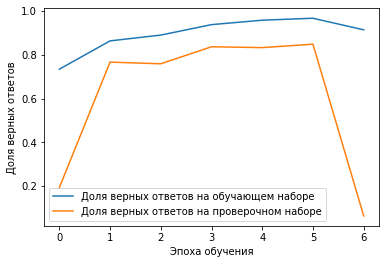

In [18]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [19]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions

array([8, 6, 4, ..., 5, 1, 3])

In [20]:
sample_submission = pd.read_csv('/content/gdrive/My Drive/kaggle/Base_line_4_4/sample_submission.csv')
sample_submission['label'] = predictions

In [21]:
sample_submission.to_csv('sample_submission.csv', index=False)